In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.linspace(0, 10, 50)
y = 3 * X + 2 + np.random.randn(50) * 2

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (50,)
y shape: (50,)


In [2]:
def forward(X, w, b):
    return w * X + b

In [3]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [8]:
def compute_gradients(X, y, y_pred):
    n = len(y)
    
    error = y_pred - y
    
    dw = (2/n) * X.T @ error
    db = (2/n) * np.sum(error)
    
    return dw, db

In [9]:
def train(X, y, lr=0.01, epochs=100):
    w = 0.0
    b = 0.0
    
    losses = []
    
    for epoch in range(epochs):
        
        y_pred = forward(X, w, b)
        
        loss = mse(y, y_pred)
        losses.append(loss)
        
        dw, db = compute_gradients(X, y, y_pred)
        
        w -= lr * dw
        b -= lr * db
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch} | Loss: {loss:.4f}")
    
    return w, b, losses


In [10]:
w, b, losses = train(X, y, lr=0.01, epochs=100)

print("\nLearned weight:", w)
print("Learned bias:", b)

Epoch 0 | Loss: 349.3146
Epoch 10 | Loss: 3.9424
Epoch 20 | Loss: 3.8807
Epoch 30 | Loss: 3.8250
Epoch 40 | Loss: 3.7746
Epoch 50 | Loss: 3.7290
Epoch 60 | Loss: 3.6878
Epoch 70 | Loss: 3.6506
Epoch 80 | Loss: 3.6170
Epoch 90 | Loss: 3.5866

Learned weight: 3.0338988799848576
Learned bias: 1.1271392941134761


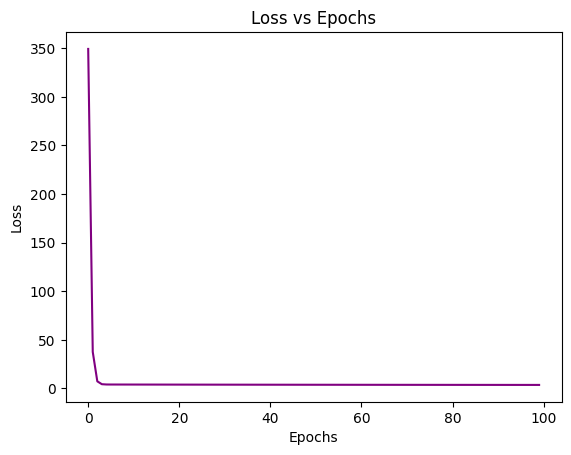

In [13]:
plt.figure()
plt.plot(losses, color="purple")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()

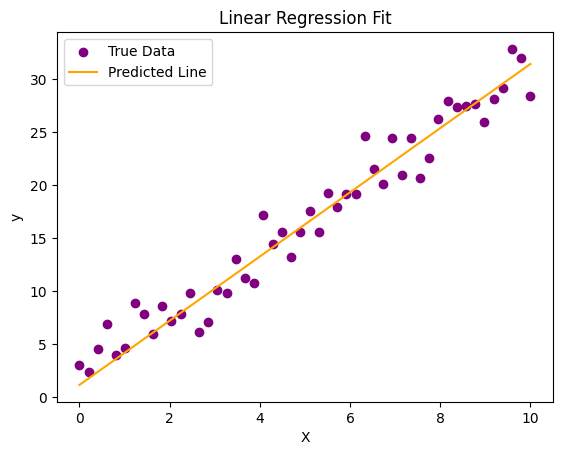

In [15]:
y_pred_final = forward(X, w, b)

plt.figure()
plt.scatter(X, y, label="True Data", color="purple")
plt.plot(X, y_pred_final, color="orange", label="Predicted Line")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()